<a href="https://colab.research.google.com/github/SivarajuRanga1002/Image-Classification-with-Resnet/blob/main/Ranga_Resnet_PartAandPartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# You can refer to torchvison models resnet for implementation details

In [ ]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [ ]:
# Load the Resnet model here in the resnet variable by making use of torchvison.models imported above

# TODO:
resnet = models.resnet50()

In [ ]:
# Print Model architecture
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# download a image in sample_data folder
!mkdir sample_data/images/
!wget https://t2.ea.ltmcdn.com/en/razas/0/0/1/labrador-retriever_100_0_orig.jpg -P sample_data/images/

mkdir: cannot create directory ‘sample_data/images/’: File exists
--2024-03-13 00:24:54--  https://t2.ea.ltmcdn.com/en/razas/0/0/1/labrador-retriever_100_0_orig.jpg
Resolving t2.ea.ltmcdn.com (t2.ea.ltmcdn.com)... 37.19.206.5, 2a02:6ea0:e200::2
Connecting to t2.ea.ltmcdn.com (t2.ea.ltmcdn.com)|37.19.206.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23915 (23K) [image/jpeg]
Saving to: ‘sample_data/images/labrador-retriever_100_0_orig.jpg.4’

labrador-retriever_ 100%[===================>]  23.35K  --.-KB/s    in 0.001s  

2024-03-13 00:24:54 (20.0 MB/s) - ‘sample_data/images/labrador-retriever_100_0_orig.jpg.4’ saved [23915/23915]



In [ ]:
# load the image
from PIL import Image
img_dog = Image.open('/content/sample_data/images/Waterbottle2.jpg').convert('RGB')

In [ ]:
# Display images
# img_dog

In [ ]:
# What's the image size??
img_dog.size

(4032, 3024)

In [ ]:
# imports for Image transformations
from torchvision import transforms

In [ ]:
# Use the trasnforms.Compose fucntion to
# Resize it to 256
# CenterCrop it to 224
# Use the ToTensor
# and Normalize it with a mean of [0.485, 0.456, 0.406] and a std of [0.229, 0.224, 0.225]


#TODO:

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std = [0.229,0.224,0.225])
])



img_dog_processed = preprocess (img_dog)

In [ ]:
img_dog_processed

tensor([[[ 1.0673,  1.0844,  1.0844,  ..., -0.8678, -0.7137, -0.6109],
         [ 1.0673,  1.0673,  1.0673,  ..., -0.8164, -0.7137, -0.3541],
         [ 1.0673,  1.0844,  1.0844,  ..., -0.5767, -0.5253, -0.1486],
         ...,
         [ 1.3242,  1.3242,  1.3242,  ...,  1.7865,  1.8550,  1.7694],
         [ 1.3413,  1.3242,  1.3242,  ...,  1.7694,  1.8379,  1.7694],
         [ 1.3242,  1.3242,  1.3242,  ...,  1.7865,  1.8722,  1.8037]],

        [[ 1.1856,  1.2031,  1.2031,  ..., -1.7556, -1.6506, -1.6331],
         [ 1.1856,  1.1856,  1.1856,  ..., -1.7206, -1.6506, -1.4580],
         [ 1.1856,  1.2031,  1.2031,  ..., -1.5280, -1.5280, -1.3004],
         ...,
         [ 1.4832,  1.4832,  1.4832,  ...,  1.7108,  1.8158,  1.7283],
         [ 1.5007,  1.4832,  1.4832,  ...,  1.7108,  1.7983,  1.7283],
         [ 1.4832,  1.4832,  1.4832,  ...,  1.7108,  1.8333,  1.7808]],

        [[ 1.1934,  1.2108,  1.2108,  ..., -1.3687, -1.2467, -1.1770],
         [ 1.1934,  1.1934,  1.1934,  ..., -1

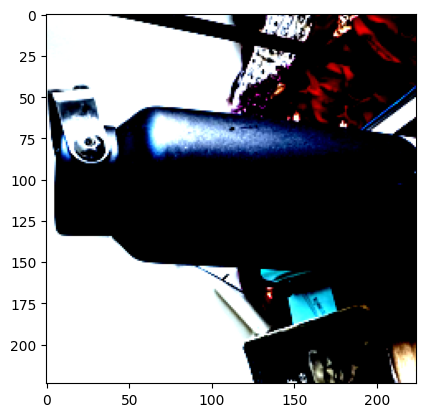

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(  img_dog_processed.permute(1, 2, 0)  )

In [ ]:
#
# Reshape, crop, and normalize the input tensor for feeding into network for evaluation
#
import torch
batch_img_dog_tensor = torch.unsqueeze(img_dog_processed, 0)

In [ ]:
# shape of input
batch_img_dog_tensor.shape

torch.Size([1, 3, 224, 224])

In [ ]:
# Change to evaluation mode from training mode

# TODO:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Prediction

# TODO:

with torch.no_grad():  # No need to compute gradients when making predictions
    out = resnet(batch_img_dog_tensor)

In [ ]:
# What prediction looks like??
out

tensor([[-6.3775e+00,  2.0553e+00,  5.3171e+00,  3.5144e+00, -1.3864e+01,
         -6.6723e+00, -1.0815e+01, -2.9208e+01, -2.4573e+00,  1.1724e+01,
          9.9756e+00, -9.0599e+00,  3.0243e+00,  1.7442e+01,  7.6016e+00,
         -1.6368e+01,  9.1866e+00,  3.8106e-01, -4.1428e-01, -7.4113e-01,
          5.9563e-01, -2.1266e+01, -1.8261e+01,  4.5872e+00, -3.0162e+00,
          3.2594e+00, -1.1448e+01, -1.7349e+01,  9.1031e+00,  3.4561e+00,
         -1.4799e+00,  7.6669e+00,  1.8242e+01,  1.9973e+00, -1.8259e+01,
         -6.1005e+00,  2.5994e+01,  8.8071e+00, -5.9893e+00,  8.3009e+00,
          2.4918e+01,  2.2248e+01,  6.8225e+00,  5.5903e+00,  1.2951e+01,
         -5.7398e+00,  7.8644e-01, -1.4781e+01, -1.5331e+01,  1.4592e+01,
         -9.2365e+00,  5.2607e+00, -6.4111e+00,  3.8311e+00,  4.0686e+00,
          6.1797e+00, -3.9378e+01,  9.2746e+00,  4.7412e+00,  8.5009e-01,
          1.0236e+01,  1.6706e+01,  3.7063e-01, -1.6255e+00, -1.9688e+01,
          6.1489e+00, -1.4581e+01, -4.

In [ ]:
# Shape of prediction
out.shape

torch.Size([1, 1000])

In [ ]:
out[0][200:210]

tensor([ -1.6679,   1.9038,  13.8946,   9.1008,  -2.8725, -23.1410,   8.2195,
        -15.8627,   6.6086,  12.2173])

In [ ]:
# Finding the maximum index

# TODO:
max_value, max_index = out.max(dim=1)
max_index

tensor([173])

In [ ]:
# Download the index to class name mapping
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-03-13 00:24:56--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.3’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-03-13 00:24:56 (61.8 MB/s) - ‘imagenet_classes.txt.3’ saved [10472/10472]



In [ ]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

predicted_class_name = labels[max_index]
print(f"Predicted class name: {predicted_class_name}")

Predicted class name: Ibizan hound


Changes for Part A

In [ ]:
# you need to select 10 classes from this list
selected_labels = ["bathtub", "ear", "backpack", "orange", "water bottle", "wallet", "snail", "fly", "car mirror", "peacock"]

In [ ]:
# Define the selected labels
selected_labels = ["bathtub", "ear", "backpack", "orange", "water bottle", "wallet", "snail", "fly", "car mirror", "peacock"]

# Find indices of the selected labels
selected_indices = {label: labels.index(label) for label in selected_labels}
print(selected_indices)

{'bathtub': 435, 'ear': 998, 'backpack': 414, 'orange': 950, 'water bottle': 898, 'wallet': 893, 'snail': 113, 'fly': 308, 'car mirror': 475, 'peacock': 84}


In [ ]:
# TODO:
# Find the index (tensor) corresponding to the maximum score in the out tensor.
# Torch.max function can be used to find the information
#
import torch
import torch.nn.functional as F


#
# Find the score in terms of percentage by using torch.nn.functional.softmax function
# which normalizes the output to range [0,1] and multiplying by 100
#
probabilities = F.softmax(out, dim=1)  # Converts logits to probabilities
percentages = probabilities * 100  # Converts probabilities to percentages

#
# Print the name along with score of the object identified by the model
#
# Assuming the batch size is 1 or you're processing one image at a time
predicted_label = labels[max_index[0]]  # Gets the label of the highest scoring class
predicted_score = percentages[0][max_index[0]].item()  # Gets the highest score in percentage
print(f"Identified Object: {predicted_label} with a confidence of {predicted_score:.2f}%")

#
# Print the top 5 scores along with the image label. Sort function is invoked on the torch to sort the scores.
#
_, indices = torch.sort(percentages, descending=True)  # Sorts the scores in descending order
top5_indices = indices[0][:5]  # Gets the indices of the top 5 scores
top5_scores = percentages[0][top5_indices]  # Gets the top 5 scores

print("Top 5 Predicted Objects and their Confidence Scores:")
for idx, score in zip(top5_indices, top5_scores):
    label = labels[idx]
    print(f"{label}: {score.item():.2f}%")


Identified Object: Ibizan hound with a confidence of 99.99%
Top 5 Predicted Objects and their Confidence Scores:
Ibizan hound: 99.99%
dishwasher: 0.00%
stethoscope: 0.00%
cash machine: 0.00%
iron: 0.00%


Update the Code For Part B

In [ ]:
# Change the model so that the architecture is something different than that of a Resnet model.

In [ ]:
from torchvision import models, transforms
from PIL import Image
import torch
import torch.nn.functional as F
import os

# Load VGG-16 model pretrained on ImageNet
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()  # Set the model to evaluation mode

# Define the preprocessing pipeline
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 75.5MB/s]


--2024-03-13 07:18:28--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.1’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-03-13 07:18:28 (60.9 MB/s) - ‘imagenet_classes.txt.1’ saved [10472/10472]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


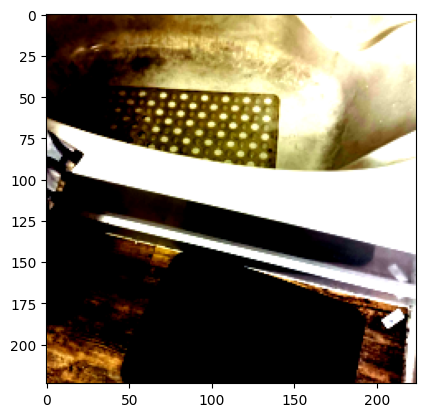

Image: BathTub1.jpg, Predicted class: bathtub, Confidence: 54.74%


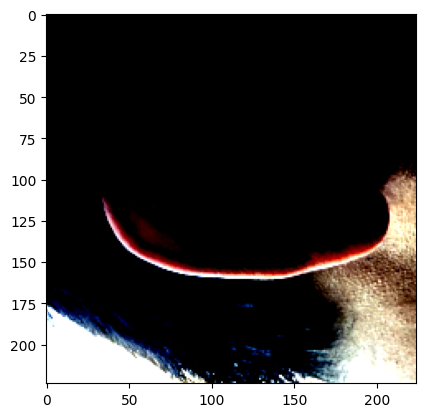

Image: Ear1.jpg, Predicted class: schipperke, Confidence: 12.05%


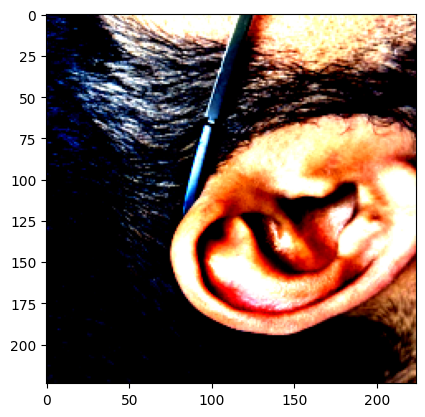

Image: Ear2.jpg, Predicted class: screwdriver, Confidence: 23.63%


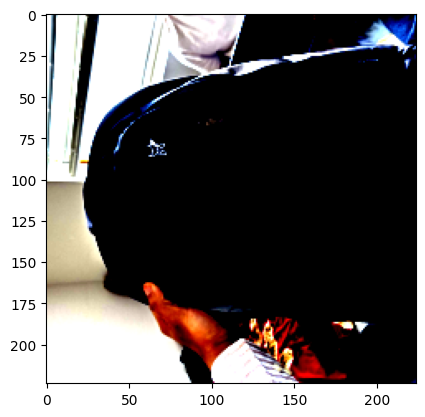

Image: Backpack1.jpg, Predicted class: backpack, Confidence: 60.63%


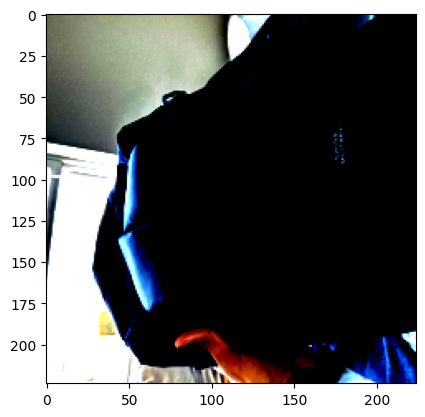

Image: Backpack2.jpg, Predicted class: backpack, Confidence: 45.93%


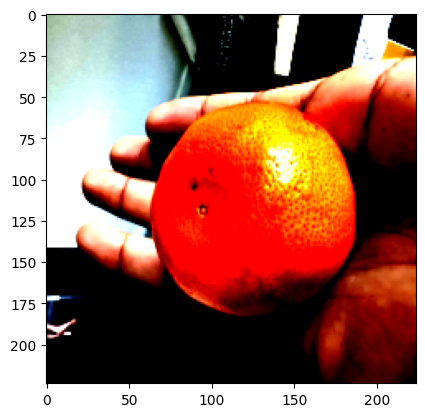

Image: Orange1.jpg, Predicted class: orange, Confidence: 94.57%


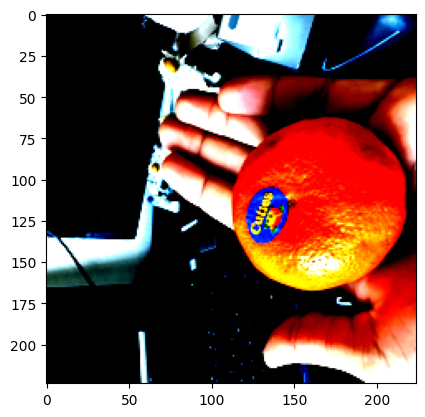

Image: Orange2.jpg, Predicted class: orange, Confidence: 24.39%


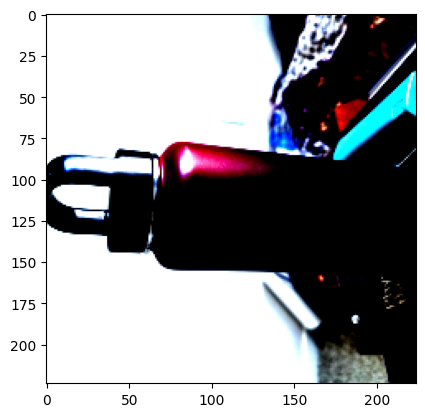

Image: WaterBottle1.jpg, Predicted class: lipstick, Confidence: 55.56%


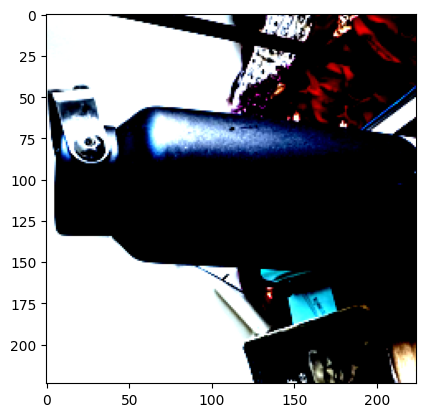

Image: Waterbottle2.jpg, Predicted class: hand blower, Confidence: 37.93%


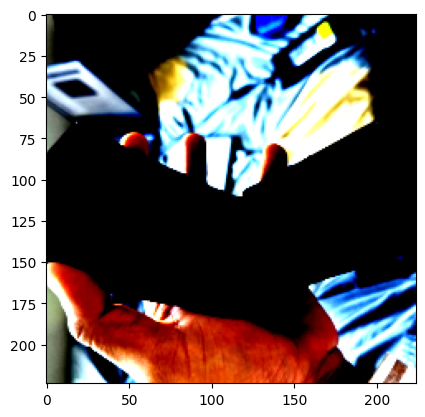

Image: Wallet1.jpg, Predicted class: wallet, Confidence: 83.53%


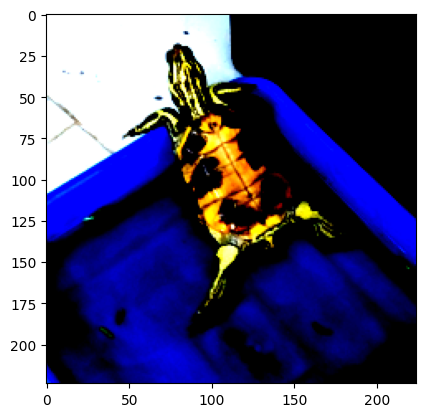

Image: Turtle1.jpg, Predicted class: terrapin, Confidence: 97.90%


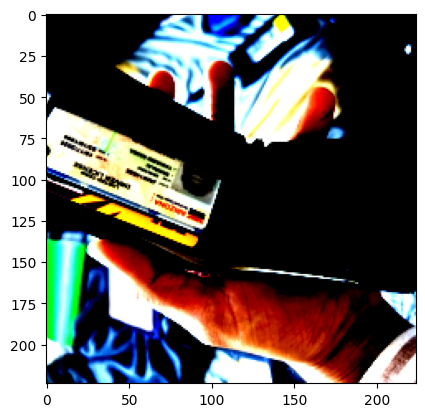

Image: Wallet2.jpg, Predicted class: wallet, Confidence: 94.09%


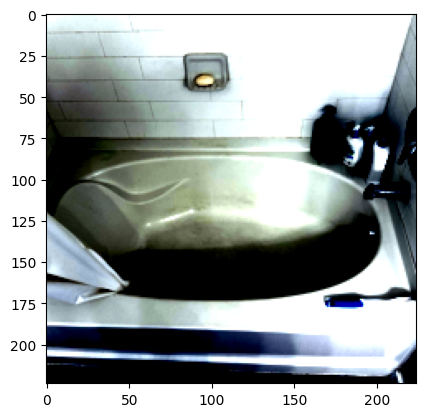

Image: Bathtub2.jpg, Predicted class: bathtub, Confidence: 55.83%


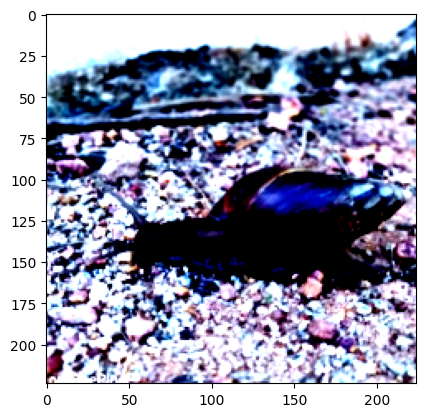

Image: Snail1.jpg, Predicted class: snail, Confidence: 98.09%


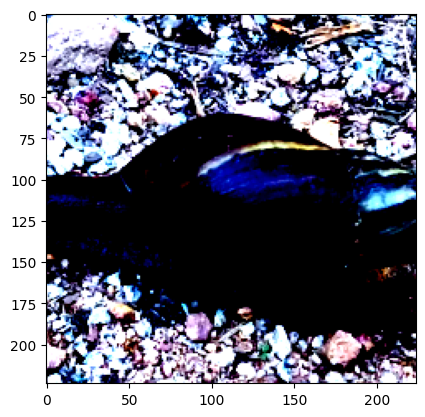

Image: Snail2.jpg, Predicted class: snail, Confidence: 99.98%


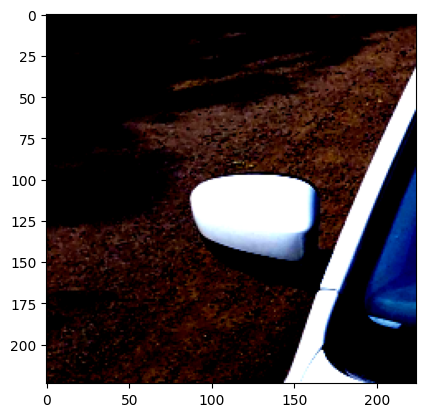

Image: CarMirror1.jpg, Predicted class: minivan, Confidence: 22.37%


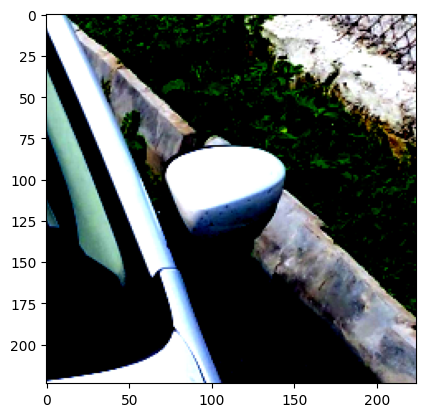

Image: CarMirror2.jpg, Predicted class: minivan, Confidence: 53.74%


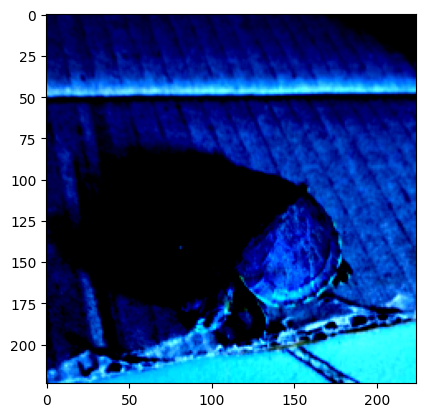

Image: Turtle2.jpg, Predicted class: mud turtle, Confidence: 44.01%


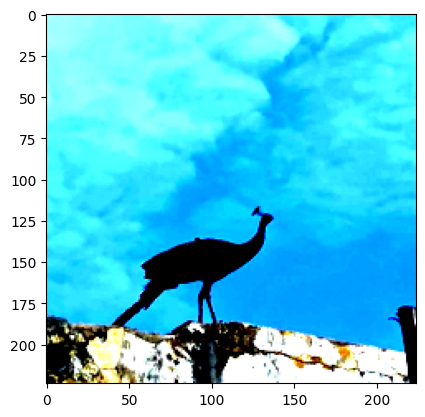

Image: Peacock1.jpg, Predicted class: peacock, Confidence: 99.13%


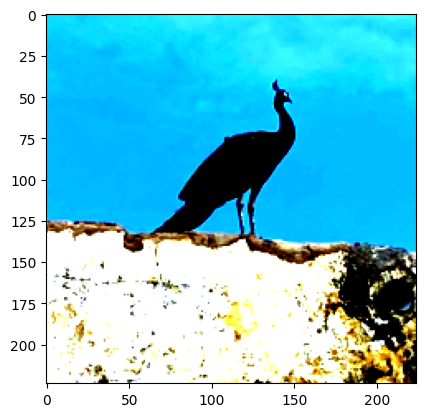

Image: Peacock2.jpg, Predicted class: peacock, Confidence: 97.38%


In [ ]:
from torchvision import models
from torchvision import transforms
from PIL import Image
import os
import torch
from google.colab import drive
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt


drive.mount('/content/drive')

images_dir = "/content/drive/My Drive/Perception/Assignment2/Ranga_imageForClassification_JPEG"

images_list = os.listdir(images_dir)

transformed_image = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

resnet = models.resnet152(pretrained=True)
resnet.eval()



for image_name in images_list:
  image_path = os.path.join(images_dir,image_name)
  color_image = Image.open(image_path).convert("RGB")

  img_processed = transformed_image(color_image)
  plt.imshow(img_processed.permute(1, 2, 0))
  plt.show()
  batch_image_tensor = torch.unsqueeze(img_processed,0)

  with torch.no_grad():
    out = resnet(batch_image_tensor)


  with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

  percentages = torch.nn.functional.softmax(out, dim=1) * 100
  _, top_pred = torch.max(percentages, 1)
  top_class = labels[top_pred.item()]

  print(f"Image: {image_name}, Predicted class: {top_class}, Confidence: {percentages[0, top_pred].item():.2f}%")








In [ ]:
# Directory containing the images
image_dir = '/content/sample_data/images/'

# Assuming you have a list of image filenames
image_filenames = os.listdir(image_dir)

# Process and predict each image
for image_name in image_filenames:
    if not image_name.endswith(('jpg', 'png', 'jpeg')):  # Skip non-image files
        continue
    # Load the image
    img_path = os.path.join(image_dir, image_name)
    img = Image.open(img_path).convert('RGB')

    # Preprocess the image
    img_processed = preprocess(img)
    batch_img_tensor = torch.unsqueeze(img_processed, 0)  # Add batch dimension

    # Make a prediction
    with torch.no_grad():
        out = vgg16(batch_img_tensor)

    # Convert output logits to probabilities and then to percentages
    percentages = torch.nn.functional.softmax(out, dim=1) * 100

    # Get the top prediction
    _, top_pred = torch.max(percentages, 1)
    top_class = labels[top_pred.item()]

    print(f"Image: {image_name}, Predicted class: {top_class}, Confidence: {percentages[0, top_pred].item():.2f}%")

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/images/'